<h1>WELLCOME to my notebook </h1>

In [31]:
import  pandas  as pd
import  numpy  as np
from matplotlib import pyplot as plt
import seaborn as sns

In [32]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_0dd3d434c3de41e382b7630f57b6f9f8 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='h16JnQWuyjKFrIl_nU0iwO08BYxC5-CEaw9gPTxePuzn',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_0dd3d434c3de41e382b7630f57b6f9f8.get_object(Bucket='coursera-donotdelete-pr-r4yct4fbv3htov',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [33]:
x=pd.DataFrame()
x=data

## Counting Null values

In [34]:
l=len(data)
for i in list(x.columns):
    print(i,' : ',l-data[i].count())
print(l)

SEVERITYCODE  :  0
X  :  5334
Y  :  5334
OBJECTID  :  0
INCKEY  :  0
COLDETKEY  :  0
REPORTNO  :  0
STATUS  :  0
ADDRTYPE  :  1926
INTKEY  :  129603
LOCATION  :  2677
EXCEPTRSNCODE  :  109862
EXCEPTRSNDESC  :  189035
SEVERITYCODE.1  :  0
SEVERITYDESC  :  0
COLLISIONTYPE  :  4904
PERSONCOUNT  :  0
PEDCOUNT  :  0
PEDCYLCOUNT  :  0
VEHCOUNT  :  0
INCDATE  :  0
INCDTTM  :  0
JUNCTIONTYPE  :  6329
SDOT_COLCODE  :  0
SDOT_COLDESC  :  0
INATTENTIONIND  :  164868
UNDERINFL  :  4884
WEATHER  :  5081
ROADCOND  :  5012
LIGHTCOND  :  5170
PEDROWNOTGRNT  :  190006
SDOTCOLNUM  :  79737
SPEEDING  :  185340
ST_COLCODE  :  18
ST_COLDESC  :  4904
SEGLANEKEY  :  0
CROSSWALKKEY  :  0
HITPARKEDCAR  :  0
194673


## Remove less Important features

In [35]:
x.drop(['SPEEDING','EXCEPTRSNCODE','EXCEPTRSNDESC','PEDROWNOTGRNT','INATTENTIONIND','INTKEY','SDOTCOLNUM','LOCATION','SEVERITYCODE.1','SEGLANEKEY', 'CROSSWALKKEY','OBJECTID','INCDATE','INCDTTM','INCKEY','COLDETKEY'],axis=1,inplace=True)

## Remove rows which contain Nan

In [36]:
x = x.dropna(axis = 0, how = 'any')

## Checking again Null values

In [37]:
l=len(x)
for i in list(x.columns):
    print(i,' : ',l-x[i].count())

SEVERITYCODE  :  0
X  :  0
Y  :  0
REPORTNO  :  0
STATUS  :  0
ADDRTYPE  :  0
SEVERITYDESC  :  0
COLLISIONTYPE  :  0
PERSONCOUNT  :  0
PEDCOUNT  :  0
PEDCYLCOUNT  :  0
VEHCOUNT  :  0
JUNCTIONTYPE  :  0
SDOT_COLCODE  :  0
SDOT_COLDESC  :  0
UNDERINFL  :  0
WEATHER  :  0
ROADCOND  :  0
LIGHTCOND  :  0
ST_COLCODE  :  0
ST_COLDESC  :  0
HITPARKEDCAR  :  0


## Visualisation

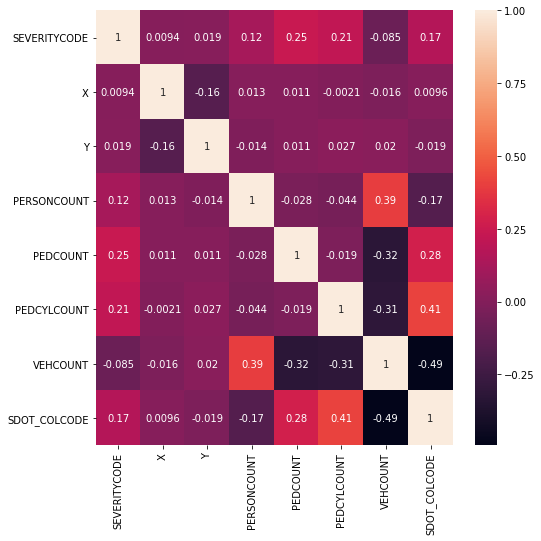

In [38]:
plt.figure(figsize=(8,8))
sns.heatmap(x.corr(),annot=True)
plt.show()

#### All features are corelated to severity code so have to consider all

In [39]:
# #swarm plot
# sns.swarmplot(y='SEVERITYCODE',x='REPORTNO',data=x)

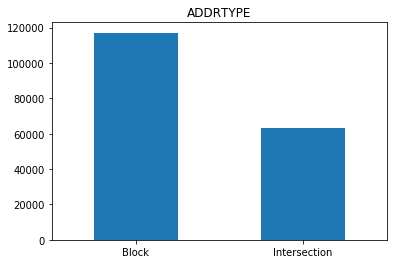

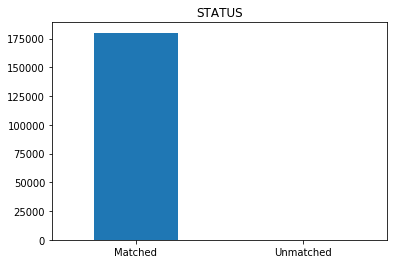

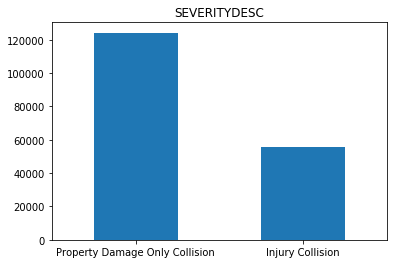

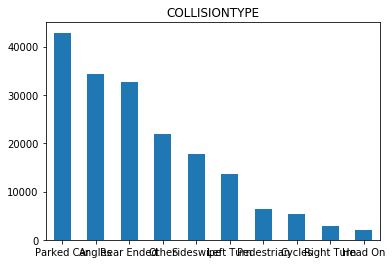

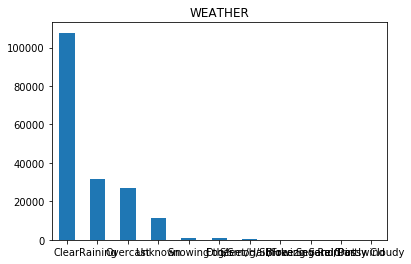

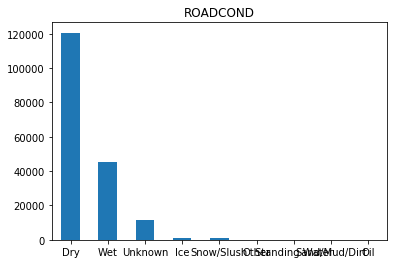

In [40]:
l=['ADDRTYPE','STATUS','SEVERITYDESC','COLLISIONTYPE','WEATHER','ROADCOND']   
for i in l:
    plt.figure()
    (x[i]).value_counts().plot(kind='bar',rot=0)
    plt.title(i)

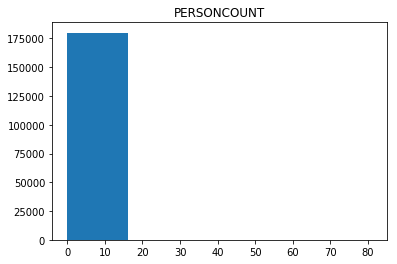

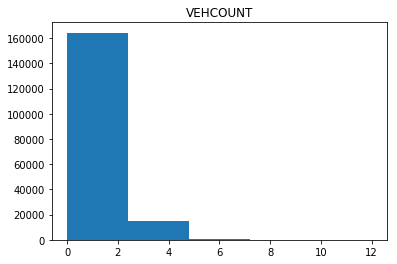

In [41]:
l2=['PERSONCOUNT','VEHCOUNT']
for i in l2:
    plt.figure()
    plt.hist(x[i],bins=5)
    plt.title(i)

## Filtering Data

In [42]:
x['STATUS']=pd.get_dummies(x['STATUS'])
x['ADDRTYPE']=pd.get_dummies(x['ADDRTYPE'])
x['SEVERITYDESC']=pd.get_dummies(x['SEVERITYDESC'])
x['HITPARKEDCAR']=pd.get_dummies(x['HITPARKEDCAR'])
x['UNDERINFL'] = x['UNDERINFL'].replace(['N'],0)
x['UNDERINFL'] = x['UNDERINFL'].replace(['Y'],1)
x['UNDERINFL']=pd.get_dummies(x['UNDERINFL'])
x['ST_COLCODE']=x['ST_COLCODE'].astype(int)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [43]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
x['COLLISIONTYPE']= label_encoder.fit_transform(x['COLLISIONTYPE'])
x['JUNCTIONTYPE']= label_encoder.fit_transform(x['JUNCTIONTYPE'])
x['SDOT_COLDESC']= label_encoder.fit_transform(x['SDOT_COLDESC'])
x['ST_COLDESC']= label_encoder.fit_transform(x['ST_COLDESC'])
x['WEATHER']= label_encoder.fit_transform(x['WEATHER'])
x['ROADCOND']= label_encoder.fit_transform(x['ROADCOND'])
x['LIGHTCOND']= label_encoder.fit_transform(x['LIGHTCOND'])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

In [44]:
x['REPORTNO']=x[['REPORTNO']].convert_objects(convert_numeric=True).dropna() 
x = x.dropna(axis = 0, how = 'any')

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [45]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150188 entries, 0 to 194671
Data columns (total 22 columns):
SEVERITYCODE     150188 non-null int64
X                150188 non-null float64
Y                150188 non-null float64
REPORTNO         150188 non-null float64
STATUS           150188 non-null uint8
ADDRTYPE         150188 non-null uint8
SEVERITYDESC     150188 non-null uint8
COLLISIONTYPE    150188 non-null int64
PERSONCOUNT      150188 non-null int64
PEDCOUNT         150188 non-null int64
PEDCYLCOUNT      150188 non-null int64
VEHCOUNT         150188 non-null int64
JUNCTIONTYPE     150188 non-null int64
SDOT_COLCODE     150188 non-null int64
SDOT_COLDESC     150188 non-null int64
UNDERINFL        150188 non-null uint8
WEATHER          150188 non-null int64
ROADCOND         150188 non-null int64
LIGHTCOND        150188 non-null int64
ST_COLCODE       150188 non-null int64
ST_COLDESC       150188 non-null int64
HITPARKEDCAR     150188 non-null uint8
dtypes: float64(3), int64

## Creating Model

In [46]:
y=pd.DataFrame()
y=x['SEVERITYCODE']
x=x.drop(['SEVERITYCODE'], axis=1)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_absolute_error

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [49]:
# tree=RandomForestClassifier(n_estimators=100)
# tree.fit(x_train, y_train)
# y_pred = tree.predict(x_test)


In [50]:
# for i in range(20): print(y_pred[i],end=' ')

In [51]:
y_test

151537    2
63393     1
98791     1
132037    1
74676     2
193630    1
137135    1
6905      1
25319     1
163812    1
188906    1
158087    2
71011     1
105612    2
147817    2
100274    1
176161    2
59670     1
173759    2
57989     1
108353    1
139563    2
130762    1
127381    2
98908     1
55745     1
70574     1
23502     1
79244     2
133005    2
         ..
121420    1
100530    1
78695     1
162601    1
13749     1
108811    1
108633    1
40966     2
22048     1
17168     1
49707     1
3502      1
129284    2
58112     2
26823     1
21148     2
40918     2
53614     1
146943    1
121923    1
126032    1
107448    2
15104     1
57356     1
53107     1
61780     1
86159     2
48326     1
135004    1
51341     1
Name: SEVERITYCODE, Length: 37547, dtype: int64

In [52]:
# c=0
# y_pred=list(y_pred)
# y_test=list(y_test)
# for i in range(len(x_test)):
#     c=c+abs(y_pred[i]-y_test[i])
# print(c*100/len(x_test))

In [53]:
# print(accuracy_score(y_pred,y_test))

In [23]:
model = SVC(kernel = 'linear', C = 1)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [54]:
confusion_matrix(y_test,y_pred)

array([[26124,     0],
       [    0, 11423]])

In [59]:
for i in range(9):
    print(y_pred[i],end=' ')

2 1 1 1 2 1 1 1 1 